In [241]:
import numpyro
numpyro.set_host_device_count(4)
import jax
jax.local_device_count()
import numpyro as npro
# print(f"JAX 64-bit enabled: {jax.config.jax_enable_x64}") # Verify
# # Set the number of devices to the number of available CPUs
# npro.set_host_device_count(multiprocessing.cpu_count())
import jax.numpy as jnp
import tqdm
import blackjax
import ravel
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt

JAX 64-bit enabled: False


In [10]:
pd.read_csv("sys_params20Jul.txt", delim_whitespace=True).iloc[18].rv_true

/var/folders/l8/g2bx224n7q35swctm351kzqc0000gn/T/ipykernel_14117/2474547947.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  pd.read_csv("sys_params20Jul.txt", delim_whitespace=True).iloc[18].rv_true


'[-163.42037173   13.82448004  153.33799929  123.96662834  110.64507624\n  -35.38684732  156.62627664  -79.2690224   140.46120115  175.5211131\n  137.64541384   76.93959959]'

In [3]:
def process_system(sys_path, output_root, lines):
    sys_name = os.path.basename(sys_path)
    print(f"\nAnalyzing {sys_name}")

    spec_files = sorted(glob(os.path.join(sys_path, "*epoch??.txt")))
    if not spec_files:
        print(f"{sys_name}: no spectra found, skipping.")
        return

    out_dir_requested = os.path.join(output_root, sys_name)
    os.makedirs(out_dir_requested, exist_ok=True)

    out_dir = ravel.SLfit(
        spec_files,
        data_path=sys_path + '/',
        save_path=out_dir_requested + '/',
        lines=lines,
        SB2=True,
        file_type='txt'
    )

    if not os.path.exists(os.path.join(out_dir, 'fit_values.csv')):
        raise FileNotFoundError(f"{sys_name}: missing fit_values.csv in {out_dir}")

    # Load RVs
    fit = pd.read_csv(os.path.join(out_dir, 'fit_values.csv'),
                      usecols=['epoch', 'MJD', 'mean_rv', 'mean_rv_er', 'comp'])



output_root = 'Sample_fit/'
sb2_dir = 'SB2_sys019_snr30/'
lines = [4026, 4144, 4388, 4471]

os.makedirs(output_root, exist_ok=True)

sys_dirs = sorted(glob(os.path.join(sb2_dir, 'SB2_sys???_snr?0')))[:1]

process_system(sys_path=sb2_dir, output_root=output_root, lines=lines)


Analyzing 


*******************************************************************************
******************           Spectral Line fitting           ******************
*******************************************************************************

*** SB2 set to: True ***


*** Fitting lines ***
---------------------
Lines to be fitted: [4026, 4144, 4388, 4471]
Fitting all lines simultaneously
Number of lines: 4
Number of epochs: 12

Fitting with profile: Voigt, Δv_means: [[[-100.]]

 [[ 100.]]]


/Users/camelot/Desktop/MASt_Project/.venv_project/lib/python3.10/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)
/Users/camelot/Desktop/MASt_Project/.venv_project/lib/python3.10/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

/Users/camelot/Desktop/MASt_Project/.venv_project/lib/python3.10/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)
/Users/camelot/Desktop/MASt_Project/.venv_project/lib/python3.10/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

/Users/camelot/Desktop/MASt_Project/.venv_project/lib/python3.10/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)
/Users/camelot/Desktop/MASt_Project/.venv_project/lib/python3.10/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=

Plotting final fits for line: 4026
Plotting final fits for line: 4144
Plotting final fits for line: 4388
Plotting final fits for line: 4471


# Incorporate nested sampling?

In [ ]:
from ravel import read_spectra, setup_star_directory_and_save_jds, setup_line_dictionary

Hlines = [4102, 4340, 4861, 6562]
wavelengths, fluxes, f_errors, names, jds = read_spectra(spectra_list, data_path, file_type, instrument=instrument, SB2=SB2)

out_path = setup_star_directory_and_save_jds(names, jds, save_path, SB2)

lines_dic = setup_line_dictionary()

print('\n*** Fitting lines ***')
print('---------------------')
print('Lines to be fitted:', lines)

# Initialize fit variables for each line (lists to hold fit results, uncertainties, etc.)
(cen1, cen1_er, amp1, amp1_er, wid1, wid1_er, 
    cen2, cen2_er, amp2, amp2_er, wid2, wid2_er, 
    dely, sdev, results, comps, delta_cen, chisqr) = initialize_fit_variables(lines)

# Open a CSV file to save summary fit values
with open(out_path + 'fit_values.csv', 'w', newline='') as csvfile:
    writer = None
    
    print('Fitting all lines simultaneously')
    if SB2:
        # SB2 fitting: fit all lines using the probabilistic SB2 model and write results to CSV
        result, x_wave, y_flux = fit_sb2_probmod(lines, wavelengths, fluxes, f_errors, lines_dic,
                                                    Hlines, neblines, out_path, K=K, shift_kms=shift_kms, 
                                                    rm_epochs=rm_epochs, chi2_plots=chi2_plots, profile=profile, sigma_prior=sigma_prior)
        writer = mcmc_results_to_file(result, names, jds, writer, csvfile, rm_epochs=rm_epochs)

        if cornerplots == True:
            for k in range(K):   # typically K=2, but robust if different
                make_rv_corner_for_component(result['Δv_τk'], k, out_path)
        


# 1. Figure out how distrax distributions work

In [1]:
import distrax
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

In [9]:
# Bijector: applies transformation to randomly sampled values
rng_key = jax.random.PRNGKey(0)
rng_key, prior_key = jax.random.split(rng_key)

dist = distrax.Normal(loc=0., scale=2.)
# BIJECTOR: SHIFS BY 3
bij = distrax.ScalarAffine(shift=jnp.asarray([3.]))
transformed_dist = distrax.Transformed(distribution=dist, bijector=bij)
samples1 = dist.sample(seed=rng_key, sample_shape=(3))
samples2 = transformed_dist.sample(seed=rng_key, sample_shape=(3))
print(samples1)
print("")
print(samples2)

[ 0.27786335  1.01867    -1.0623221 ]

[[3.2778633]
 [4.01867  ]
 [1.9376779]]


In [49]:
# Creating a truncated distribution
key = jax.random.PRNGKey(0)
nlive = 1e4

# Amplitude example
dist = distrax.Normal(loc=0.18, scale=0.06)
# Scalar affine: Forward: `y = scale * x + shift`
# Chain: composes multiple bijectors in sequence
lo = 0.02
hi = 0.40
bij = distrax.Chain([distrax.ScalarAffine(shift=lo, scale=(hi - lo)), distrax.Sigmoid()])
truncated_dist = distrax.Transformed(distribution=dist, bijector=bij)
samples = transformed_dist.sample(seed=rng_key, sample_shape=(nlive,))
#samples = dist.sample(seed=rng_key, sample_shape=(nlive,))

samples1 = dist.sample(seed=rng_key, sample_shape=(nlive,))

bij_1 = distrax.Sigmoid()
trans1 = distrax.Transformed(distribution=dist, bijector=bij_1)
samples2 = trans1.sample(seed=rng_key, sample_shape=(nlive,))

bij_2 = distrax.ScalarAffine(shift=lo, scale=(hi - lo))
trans2 = distrax.Transformed(distribution=dist, bijector=bij_2)
samples3 = trans2.sample(seed=rng_key, sample_shape=(nlive,))


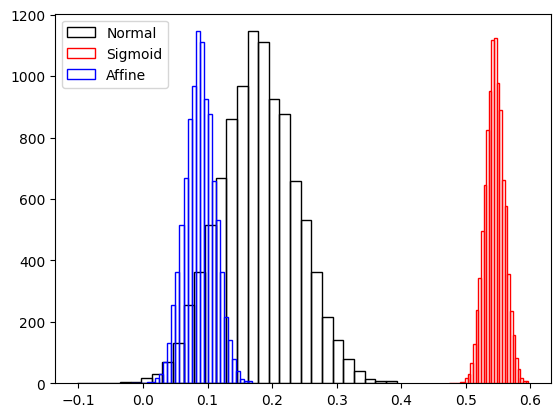

In [51]:
plt.hist(samples1, bins=30, facecolor="none", edgecolor='k', label='Normal')
plt.hist(samples2, bins=30, facecolor="none", edgecolor='r', label='Sigmoid')
plt.hist(samples3, bins=30, facecolor="none", edgecolor='b', label='Affine')
plt.legend()


In [63]:
import numpy as np

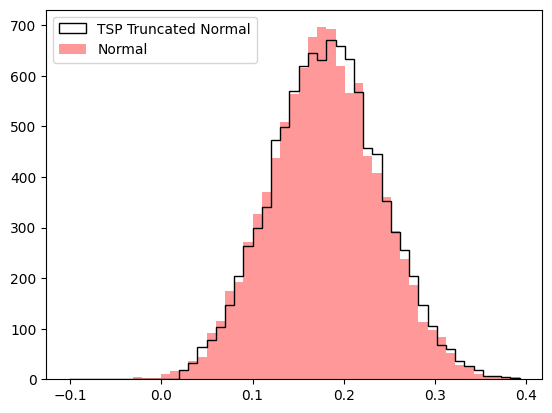

In [70]:
# Using Tensforflow Probability
from tensorflow_probability.substrates import jax as tfp
bins = np.linspace(min(samples1), max(samples1), 50)

key = jax.random.PRNGKey(0)
tfd = tfp.distributions

dist_tfp = tfd.TruncatedNormal(
    loc=0.18,
    scale=0.06,
    low=0.02,
    high=0.4,
)

samples_tfp = dist_tfp.sample(nlive, seed=key)

plt.hist(samples_tfp, bins=bins, facecolor='none', edgecolor='k', histtype='step', label='TSP Truncated Normal')
plt.hist(samples1, bins=bins, facecolor="r", edgecolor='none', label='Normal', alpha=0.4)
plt.legend()
plt.show()


In [28]:
distrax.Lambda?

Init signature:
distrax.Lambda(
    forward: Optional[Callable[[Union[jax.Array, numpy.ndarray, numpy.bool_, numpy.number]], Union[jax.Array, numpy.ndarray, numpy.bool_, numpy.number]]] = None,
    inverse: Optional[Callable[[Union[jax.Array, numpy.ndarray, numpy.bool_, numpy.number]], Union[jax.Array, numpy.ndarray, numpy.bool_, numpy.number]]] = None,
    forward_log_det_jacobian: Optional[Callable[[Union[jax.Array, numpy.ndarray, numpy.bool_, numpy.number]], Union[jax.Array, numpy.ndarray, numpy.bool_, numpy.number]]] = None,
    inverse_log_det_jacobian: Optional[Callable[[Union[jax.Array, numpy.ndarray, numpy.bool_, numpy.number]], Union[jax.Array, numpy.ndarray, numpy.bool_, numpy.number]]] = None,
    event_ndims_in: Optional[int] = None,
    event_ndims_out: Optional[int] = None,
    is_constant_jacobian: Optional[bool] = None,
)
Docstring:     
Wrapper to automatically turn JAX functions into fully fledged bijectors.

This class takes in JAX functions that implement bijector m

In [242]:
# RAVEL.PY WORK ON fit_sb2_probmod
from tensorflow_probability.substrates import jax as tfp
import distrax


def fit_sb2_probmod(lines, wavelengths, fluxes, f_errors, lines_dic, Hlines, neblines, path, sigma_prior, K=2, shift_kms=0,
                    wavelength_type='air', rm_epochs=None, profile='Voigt', chi2_plots=False):
    """
    Fit SB2 (double-lined spectroscopic binary) spectral lines using a probabilistic
    model with Numpyro. The function interpolates spectral data onto a common grid,
    constructs a Bayesian model for the line profiles, and samples the posterior via
    MCMC (using NUTS). To improve robustness against switching, a second model is constructed
    that re-samples only the RV posteriors. The best-fitting result between both runs is 
    determined via a χ2 comparison.
    
    Parameters:
    -----------
    lines : list
        List of spectral line identifiers (keys from lines_dic) to be fitted.
    wavelengths : list
        List (per epoch) of wavelength arrays.
    fluxes : list
        List (per epoch) of flux arrays.
    f_errors : list
        List (per epoch) of flux error arrays.
    lines_dic : dict
        Dictionary containing spectral line regions, initial centre guesses, etc.
    Hlines : list
        List of lines (subset of `lines`) that are Hydrogen lines.
    neblines : list
        (Currently unused) List of nebular lines.
    path : str
        Path for storing output plots.
    sigma_prior : float
        Sigma on Gaussian priors for RV fitting in the second MCMC run [km/s].
    K : int, optional
        Number of components (default 2).
    shift_kms : float, optional
        The overall velocity shift in km/s. For example, use 172 km/s for the SMC.
    wavelength_type : str, optional
        Type of wavelength to use ('air' or 'vacuum'). Default is 'air'.
    rm_epochs : list, optional
        The indices (0-based) of the epochs to remove from the fitting.
    profile : str, optional ('Voigt' or 'Gaussian)
        Profile type used for all components in the spectral line fitting.
    chi2_plots : bool
        Enable/disable seperate plotting of first, second, and final (stitched) MCMC results.

    Returns:
    --------
    trace : dict
        The MCMC trace (posterior samples).
    x_waves : array (JAX)
        The interpolated wavelength grid for each line and epoch.
    y_fluxes : array (JAX)
        The interpolated fluxes.
    """
    n_lines = len(lines)
    n_epochs = len(wavelengths)
    print('Number of lines:', n_lines)
    print('Number of epochs:', n_epochs)

    # Determine the key to use based on the chosen wavelength type
    key = 'centre' if wavelength_type == 'vacuum' else 'air'

    # Boolean mask for Hydrogen lines (will use Lorentzian instead of Gaussian)
    is_hline = jnp.array([line in Hlines for line in lines])

    # Interpolate fluxes and errors to a common grid
    x_waves_interp = []
    y_fluxes_interp = []
    y_errors_interp = []
    common_grid_length = 200  # Choose a consistent number of points for interpolation

    for line in lines:
        region_start, region_end = lines_dic[line]['region']
        # Shift the region boundaries by shift_kms
        region_start = rv_shift_wavelength(region_start, shift_kms)
        region_end = rv_shift_wavelength(region_end, shift_kms)

        x_waves_line = []
        y_fluxes_line = []
        y_errors_line = []

        for wave_set, flux_set, error_set in zip(wavelengths, fluxes, f_errors):
            mask = (wave_set > region_start) & (wave_set < region_end)
            wave_masked = wave_set[mask]
            flux_masked = flux_set[mask]
            if error_set is not None:
                error_masked = error_set[mask]
            else:
                f_err = compute_flux_err(wave_set, flux_set)
                error_masked = f_err[mask]

            # Interpolate onto a common wavelength grid for this line and epoch
            common_wavelength_grid = np.linspace(wave_masked.min(), wave_masked.max(), common_grid_length)
            interp_flux = interp1d(wave_masked, flux_masked, bounds_error=False, fill_value="extrapolate")(common_wavelength_grid)
            interp_error = interp1d(wave_masked, error_masked, bounds_error=False, fill_value="extrapolate")(common_wavelength_grid)
            x_waves_line.append(common_wavelength_grid)
            y_fluxes_line.append(interp_flux)
            y_errors_line.append(interp_error)

        x_waves_interp.append(x_waves_line)
        y_fluxes_interp.append(y_fluxes_line)
        y_errors_interp.append(y_errors_line)

    # Convert the interpolated lists to JAX arrays (all dimensions now match)
    x_waves = jnp.array(x_waves_interp)       # Shape: (n_lines, n_epochs, common_grid_length)
    y_fluxes = jnp.array(y_fluxes_interp)       # Shape: (n_lines, n_epochs, common_grid_length)
    y_errors = jnp.array(y_errors_interp)       # Shape: (n_lines, n_epochs, common_grid_length)

    # Remove bad epochs along the second axis (axis=1)
    if rm_epochs is not None:
        x_waves = jnp.delete(x_waves, jnp.array(rm_epochs), axis=1)
        y_fluxes = jnp.delete(y_fluxes, jnp.array(rm_epochs), axis=1)
        y_errors = jnp.delete(y_errors, jnp.array(rm_epochs), axis=1)

    # Initial guess for the rest (central) wavelength from lines_dic
    cen_ini = jnp.array([lines_dic[line][key][0] for line in lines])

    # SET UP JAX PRIORS
    c_kms = c.to('km/s').value  
    nlines, nepochs, ndata = λ.shape

    # Set up priors
    tfd = tfp.distributions

    # Continuum
    logσ_ε_prior = distrax.Uniform(-5,0)
    σ_ε = jnp.exp(logσ_ε)
    ε_prior = tfd.TruncatedNormal(loc=1.0, scale=σ_ε, low=0.7, high=1.1)

    # Define rest wavelengths as a parameter (one per line)
    λ_rest_prior = distrax.Independent(
    tfd.Normal(loc=cen_ini,
                scale = jnp.full(nlines, 1e-3),
    reinterpreted_batch_ndims=1) # Does this make sense?
    )

    # AMPLITUDES (across all lines)
    amp0_prior = tfd.Independent(
    tfd.TruncatedNormal(loc=jnp.full(nlines, 0.18), # array of shape (nlines), defining the same dist.
                        scale=jnp.full(nlines, 0.06),
                        low=jnp.full(nlines, 0.02),
                        high=jnp.full(nlines, 0.40)),
                        1 # Absorb the above dimensions to evaluate as one log-prob (?)
    )

    amp_ratio_prior = tfd.Independent(
    tfd.TruncatedNormal(loc=jnp.full(nlines, 0.60), # array of shape (nlines), defining the same dist.
                        scale=jnp.full(nlines, 0.15),
                        low=jnp.full(nlines, 0.25),
                        high=jnp.full(nlines, 0.95)),
                        1 # Absorb the above dimensions to evaluate as one log-prob (?)
    )

    # WIDTHS (across all lines)
    # Gaussian
    wid_G1_prior = distrax.Independent(distrax.Uniform(low=jnp.full(nlines,0.5), high=jnp.full(nlines, 5.0)), 1)
    wid_L1_prior = distrax.Independent(distrax.Uniform(low=jnp.full(nlines,0.1), high=jnp.full(nlines, 3.0)), 1)
    # Lorentzian
    delta_wid_G_prior = distrax.Independent(distrax.Uniform(low=jnp.full(nlines,0.1), high=jnp.full(nlines, 2.0)), 1)
    delta_wid_L_prior = distrax.Independent(distrax.Uniform(low=jnp.full(nlines,0.05), high=jnp.full(nlines, 1.0)), 1)

    # RADIAL VELOCITIES (for each epcoh + component)
    σ_Δv = 200.

    Δv_means  = jnp.array([shift_kms - comp_sep/2, shift_kms + comp_sep/2])   # shape (K,)
    Δv_loc   = jnp.tile(dv_means[:, None], (1, E))                               # (K,E)
    Δv_τk_prior = distrax.Independent(distrax.Normal(loc=dv_loc, scale=jnp.full((K, E), 200.0)), 2)

    def prior_sample(seed, sample_shape=()):
        k = jax.random.split(seed, 10)

        # TFP draws (truncated normals and uniform)
        logσ_ε  = logσ_ε_prior.sample(seed=k[0], sample_shape=sample_shape)                  # ()
        ε       = ε_prior(logσ_ε).sample(seed=k[1], sample_shape=sample_shape)        # ()
        amp0      = amp0_prior.sample(seed=k[2], sample_shape=sample_shape)                  # (L,)
        amp_ratio = amp_ratio_prior.sample(seed=k[3], sample_shape=sample_shape)             # (L,)

        # Distrax draws
        λ_rest = λ_rest_prior.sample(seed=k[4], sample_shape=sample_shape)                       # (L,)
        wid_G1 = wid_G1_prior.sample(seed=k[5], sample_shape=sample_shape)                       # (L,)
        wid_L1 = wid_L1_prior.sample(seed=k[6], sample_shape=sample_shape)                       # (L,)
        delta_wid_G = delta_wid_G_prior.sample(seed=k[7], sample_shape=sample_shape)                       # (L,)
        delta_wid_L = delta_wid_L_prior.sample(seed=k[8], sample_shape=sample_shape)                       # (L,)
        Δv_τk  = Δv_τk_prior.sample(seed=k[9], sample_shape=sample_shape)                        # (K,E)

        return {
            "logσ_ε": logσ_ε, "ε": ε, "λ_rest": λ_rest,
            "amp0": amp0, "amp_ratio": amp_ratio,
            "wid1_G": wid1_G, "wid1_L": wid1_L, "dwid_G": dwid_G, "dwid_L": dwid_L,
            "Δv_τk": Δv_τk,
        }

    def prior_log_prob(params):
        lp  = logσ_ε_prior.log_prob(params["logσ_ε"])
        # lp += make_eps_prior(params["logσ_ε"]).log_prob(params["ε"])
        lp += ε_prior.log_prob(params["ε"])
        lp += amp0_prior.log_prob(params["amp0"])
        lp += amp_ratio_prior.log_prob(params["amp_ratio"])
        lp += λ_rest_prior.log_prob(params["λ_rest"])
        lp += wid1_G_prior.log_prob(params["wid1_G"])
        lp += wid1_L_prior.log_prob(params["wid1_L"])
        lp += dwid_G_prior.log_prob(params["dwid_G"])
        lp += dwid_L_prior.log_prob(params["dwid_L"])
        lp += Δv_τk_prior.log_prob(params["Δv_τk"])
        return lp


    # Prior over MATRIX of sampled variables, of size K,E - RV for each component, each epochs (across all lines)
    # Prior centered on Δv_means for each component, each epoch

    def flux_pred(params, lam_grid, is_hline, profile="Voigt"):
        """
        params: dict of JAX arrays
        - ε: scalar
        - λ_rest: (L,)
        - amp0, amp_ratio: (L,)
        - wid1_G, wid1_L, dwid_G, dwid_L: (L,)
        - Δv_τk: (K,E)   # component RVs per epoch
        lam_grid: (L,E,N)
        is_hline: (L,)
        returns: f_pred (L,E,N)
        """
        c_kms = c.to('km/s').value  
        L, E, N = lam_grid.shape
        ε = params["ε"]

        # amplitudes for the two components → (K,L,1,1)
        amp0 = params["amp0"]
        amp1 = params["amp_ratio"] * amp0
        A = jnp.stack([amp0, amp1], axis=0)[:, :, None, None]

        # widths → (K,L,1,1)
        wid_G1, wid_L1 = params["wid_G1"], params["wid_L1"]
        delta_wid_G, delta_wid_L = params["delta_wid_G"], params["delta_wid_L"]
        wid_G = jnp.stack([wid_G1, wid_G1+delta_wid_G], axis=0)[:, :, None, None]
        wid_L = jnp.stack([wid_L1, wid_L1+delta_wid_L], axis=0)[:, :, None, None]

        # centers per component & epoch
        lam0 = params["λ_rest"][None, :, None, None]              # (1,L,1,1)
        dv   = params["Δv_τk"][:, None, :, None]                  # (K,1,E,1)
        mu   = lam0 * (1.0 + dv / c_kms)                          # (K,L,E,1)

        lam  = lam_grid[None, :, :, :]                            # (1,L,E,N)
        isH  = is_hline[None, :, None, None]                      # (1,L,1,1)

        # your existing kernels must be JAX-friendly (no Python loops, no side effects)
        G  = gaussian(lam, A, mu, wid_G)                          # (K,L,E,N)
        Lr = lorentzian(lam, A, mu, wid_L)                        # (K,L,E,N)
        V  = pseudo_voigt(lam, A, mu, wid_G, wid_L)               # (K,L,E,N)

        if profile == "Voigt":
            comp = jnp.where(isH, Lr, V)
        elif profile == "Gaussian":
            comp = jnp.where(isH, Lr, G)
        else:
            raise ValueError("profile must be 'Voigt' or 'Gaussian'")

        f_pred = ε + comp.sum(axis=0)                           # (L,E,N)
        return f_pred

    def loglikelihood_fn(params):
        f_pred = flux_pred(params, x_waves, is_hline, profile)     # (L,E,N)
        resid  = (y_fluxes - f_pred) / y_errors
        log_like = -jnp.log(y_errors * jnp.sqrt(2*jnp.pi)) -0.5*resid**2
        return log_like
        
        
    print(f"\nFitting with profile: {profile}, Δv_means: {Δv_means}")

    # Initial population of live points
    rng_key  = jax.random.PRNGKey(0)
    n_live = 1200
    initial_population = prior_sample(rng_key, sample_shape=(n_live,))

    d_guess = (1 + 1) + 3*L + 4*L + (K*E)

    algo = blackjax.nss(
        logprior_fn      = prior_log_prob,
        loglikelihood_fn = loglikelihood_fn,
        num_delete       = int(n_live*0.1),
        num_inner_steps  = 3 * D_guess,
    )

    # NESTED SAMPLING LOOP
    from blackjax.ns.base import NSState
    from blackjax.ns.base import NSInfo

    @jax.jit
    def one_step(carry, xs):
        state, k = carry
        k, subk = jax.random.split(k, 2)
        state, dead_point = algo.step(subk, state)
        return (state, k), dead_point

    iteration_count = 0
    live_points_snapshots = []
    dead = []

    with tqdm.tqdm(desc="Dead points", unit=" dead points") as pbar:
        live_points_snapshots.append(jnp.array(state.particles[..., :2]))
        
        while not state.logZ_live - state.logZ < -5:
            iteration_count += 1
            (state, rng_key), dead_info = one_step((state, rng_key), None)
            dead.append(dead_info)
            pbar.update(num_delete)

            live_points_snapshots.append(jnp.array(state.particles[..., :2]))

    live_points_snapshots.append(jnp.array(state.particles[..., :2]))

    # POST-PROCESSING
    from blackjax.ns.utils import log_weights, finalise, sample, ess

    rng_key, weight_key, sample_key = jax.random.split(rng_key,3)
    final_state = finalise(state,dead)
    log_w = log_weights(weight_key, final_state, shape=100)
    samples = sample(sample_key, final_state, shape = n_live)
    ns_ess = ess(sample_key, final_state)
    logzs = jax.scipy.special.logsumexp(log_w, axis=0)

    final_state = finalise(state, dead)
    rng_key, sk = jax.random.split(rng_key)
    posterior   = sample(sk, final_state, shape=num_live)

    return final_state, posterior, live_points_snapshots




    # state = jax.jit(ns.init)(particles)
    # step  = jax.jit(ns.step)

    # dead = []
    # # Fixed-iteration loop for v1 (simple & robust). Improve later with a live-evidence stop rule.
    # for _ in range(1000):
    #     rng_key, subk = jax.random.split(rng_key)
    #     state, dead_info = step(subk, state)
    #     dead.append(dead_info)

    # # Finalise & draw posterior samples (dict; same keys as your params)
    # final_state = finalise(state, dead)
    # rng_key, sk = jax.random.split(rng_key)
    # posterior   = sample(sk, final_state, shape=num_live)

    # # Evaluate model for each posterior sample
    # def _predict_one(p): return flux_pred(p, x_waves, is_hline, profile)
    # f_post  = jax.vmap(_predict_one)(posterior)   # (S,L,E,N), S=num_live
    # Δv_post = posterior["Δv_τk"]                  # (S,K,E)

    # # Build your representative per-epoch model (same logic you already use)
    # S = f_post.shape[0]
    # n_sols = min(200, S)
    # model_result = jnp.empty_like(x_waves)

    # for e in range(E):
    #     rv1 = jnp.asarray(Δv_post[:, 0, e])                 # component-1 RVs at epoch e
    #     center, _, _ = summarize_mode_1d(np.asarray(rv1))   # your helper
    #     idx = np.argsort(np.abs(np.asarray(rv1) - center))[:n_sols]
    #     model_result = model_result.at[:, e, :].set(f_post[idx, :, e, :].mean(axis=0))

    # chi2_final = get_chi2(y_fluxes, model_result, y_errors)

    # return 

In [79]:
# Explore INDEPENDENT

key = random.PRNGKey(42)

# Basic dist: 3 separate, scalar normal dists
dist = distrax.Normal(loc=jnp.array([10., 20., 30.]), scale=jnp.full(3, 1.0))

print(f"Base Distribution (3 separate scalars)")
print(f"batch_shape: {dist.batch_shape}")
print(f"event_shape: {dist.event_shape}")

key, subk = random.split(key)
sample_1 = dist.sample(seed=subk, sample_shape=())
print(f"Sample (shape {sample_1.shape}): {sample_1}")

# INDEPENDENT VER
independent_dist = distrax.Independent(
    distribution=dist, # 3 distributions
    reinterpreted_batch_ndims=1 # sum together for loglikelihood
)

print(f"\nIndependent dist")
print(f"batch_shape: {independent_dist.batch_shape}")
print(f"batch_shape: {independent_dist.event_shape}")
# Sample
sample_2 = independent_dist.sample(seed=key, sample_shape=())
print(f"Sample (shape {sample_2.shape}): {sample_2}")


# LOG PROB diff
x = jnp.array([10., 20., 30.]) 

# Base
log_prob_base = dist.log_prob(x)
print(f"\nBase log_prob: {log_prob_base}")

# Independent
log_prob_independent = independent_dist.log_prob(x)
print(f"Independent log_prob: {log_prob_independent}")

# Sum(Base)
print(f"Sum of Base Log-Probs: {log_prob_base.sum():.6f}")

Base Distribution (3 separate scalars)
batch_shape: (3,)
event_shape: ()
Sample (shape (3,)): [ 9.432449 20.284391 29.06794 ]

Independent dist
batch_shape: ()
batch_shape: (3,)
Sample (shape (3,)): [10.633301 20.961092 31.362577]

Base log_prob: [-0.9189385 -0.9189385 -0.9189385]
Independent log_prob: -2.7568154335021973
Sum of Base Log-Probs: -2.756815


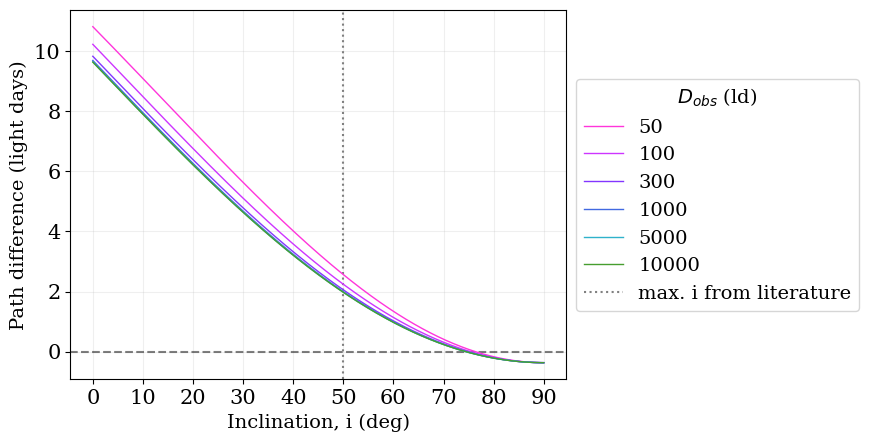

In [240]:
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Computer Modern']
plt.rcParams.update({'font.size': 14})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

colors = [
    '#FF35DB',  # W2
    '#CD35FF',  # M2
    '#8335FF',  # W1
    'royalblue',  # up
    '#2FB2CB',  # B
    '#479E2F',  # gp
    '#B9BA2B',  # V
    '#FF8234',  # rp
    '#CC2214',  # ip
    '#7E0992'   # zs
]

def calc_diff(dist):
    post = 1 #ld
    site1 = 1 #ld
    site2 = 11 #ld

    i = np.linspace(0,np.pi/2,1000) # angle of inclination between 0˚ * 90˚

    y_star = dist * np.sin(i)
    x_star = dist * np.cos(i)
    d1 = np.sqrt(post**2 + site1**2) + np.sqrt(site1**2 + dist**2 -2*site1*dist*np.cos(np.pi/2 - i))
    d2 = np.sqrt(post**2 + site2**2) + np.sqrt(site2**2 + dist**2 -2*site2*dist*np.cos(np.pi/2 - i))
    diff = d2-d1 # in light days
    return i, diff

for c, dist in enumerate([50, 100,300,1000,5000,10000]):
    i, diff = calc_diff(dist)
    plt.plot(np.rad2deg(i), diff, zorder=10, label=f'{dist}', lw=1, c=colors[c])
plt.xticks(np.linspace(0,90,10))
plt.axhline(0,c='k',alpha=0.5,ls='--')
plt.xlabel('Inclination, i (deg)')
plt.ylabel('Path difference (light days)')
plt.axvline(50, c='grey', ls='dotted', label='max. i from literature')
plt.grid(which='both', alpha=0.2)
plt.legend(title=r'$D_{obs}$ (ld)', loc='center left', bbox_to_anchor=(1, 0.5))


In [218]:
diff[-1]

-0.3688525451852911

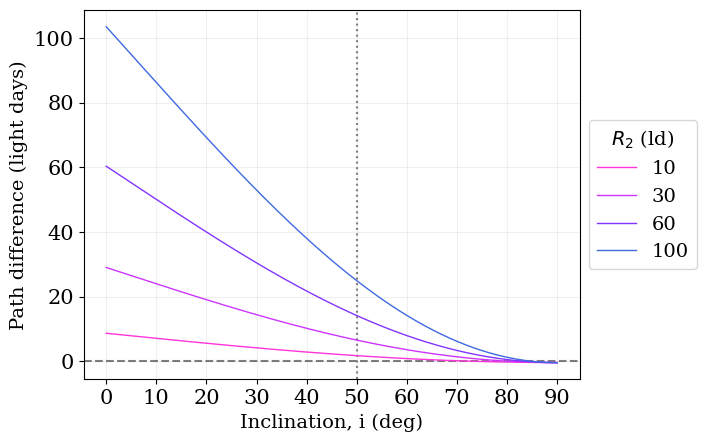

In [226]:
%matplotlib inline

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Computer Modern']
plt.rcParams.update({'font.size': 14})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

colors = [
    '#FF35DB',  # W2
    '#CD35FF',  # M2
    '#8335FF',  # W1
    'royalblue',  # up
    '#2FB2CB',  # B
    '#479E2F',  # gp
    '#B9BA2B',  # V
    '#FF8234',  # rp
    '#CC2214',  # ip
    '#7E0992'   # zs
]

def calc_diff(site2, dist):
    post = 1 #ld
    site1 = 1 #ld

    i = np.linspace(0,np.pi/2,1000) # angle of inclination between 0˚ * 90˚

    y_star = dist * np.sin(i)
    x_star = dist * np.cos(i)
    d1 = np.sqrt(post**2 + site1**2) + np.sqrt(site1**2 + dist**2 -2*site1*dist*np.cos(np.pi/2 - i))
    d2 = np.sqrt(post**2 + site2**2) + np.sqrt(site2**2 + dist**2 -2*site2*dist*np.cos(np.pi/2 - i))
    diff = d2-d1 # in light days
    return i, diff

for c, site2 in enumerate([10,30,60,100]):
    i, diff = calc_diff(site2, 1000)
    plt.plot(np.rad2deg(i), diff, zorder=10, label=f'{site2}', lw=1, c=colors[c])
plt.xticks(np.linspace(0,90,10))
plt.axhline(0,c='k',alpha=0.5,ls='--')
plt.xlabel('Inclination, i (deg)')
plt.ylabel('Path difference (light days)')
plt.axvline(50, c='grey', ls='dotted')
plt.grid(which='both', alpha=0.2)
plt.legend(title=r'$R_2$ (ld)', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


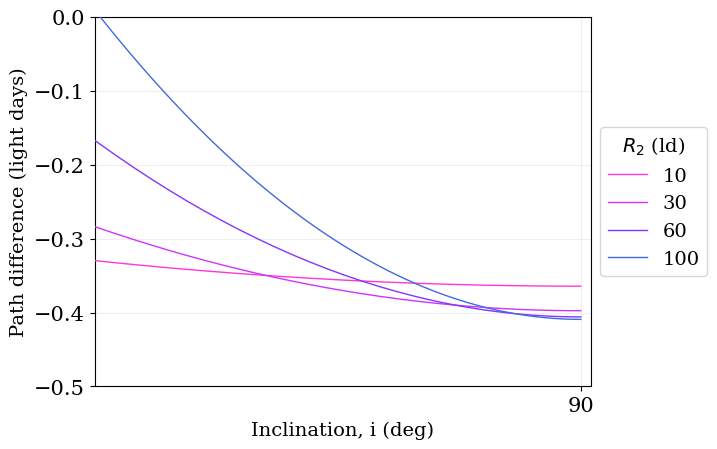

In [225]:
%matplotlib inline

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Computer Modern']
plt.rcParams.update({'font.size': 14})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

colors = [
    '#FF35DB',  # W2
    '#CD35FF',  # M2
    '#8335FF',  # W1
    'royalblue',  # up
    '#2FB2CB',  # B
    '#479E2F',  # gp
    '#B9BA2B',  # V
    '#FF8234',  # rp
    '#CC2214',  # ip
    '#7E0992'   # zs
]

def calc_diff(site2, dist):
    post = 1 #ld
    site1 = 1 #ld

    i = np.linspace(0,np.pi/2,1000) # angle of inclination between 0˚ * 90˚

    y_star = dist * np.sin(i)
    x_star = dist * np.cos(i)
    d1 = np.sqrt(post**2 + site1**2) + np.sqrt(site1**2 + dist**2 -2*site1*dist*np.cos(np.pi/2 - i))
    d2 = np.sqrt(post**2 + site2**2) + np.sqrt(site2**2 + dist**2 -2*site2*dist*np.cos(np.pi/2 - i))
    diff = d2-d1 # in light days
    return i, diff

for c, site2 in enumerate([10,30,60,100]):
    i, diff = calc_diff(site2, 1000)
    plt.plot(np.rad2deg(i), diff, zorder=10, label=f'{site2}', lw=1, c=colors[c])
plt.xticks(np.linspace(0,90,10))
plt.axhline(0,c='k',alpha=0.5,ls='--')
plt.xlabel('Inclination, i (deg)')
plt.ylabel('Path difference (light days)')
plt.axvline(50, c='grey', ls='dotted')
plt.grid(which='both', alpha=0.2)
plt.legend(title=r'$R_2$ (ld)', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(85,90.1)
plt.ylim(-0.5,0)
plt.show()


In [221]:
np.sqrt(1 + 11**2) - np.sqrt(1 + 1**2) - 10

-0.36885254518583466

In [231]:
np.sqrt(1 + 60**2) - np.sqrt(1 + 1**2) - 59

-0.4058808076631024

In [179]:
np.sqrt(122) - np.sqrt(2) - 10

-0.36885254518583466